In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error

from sklearn import datasets
data = datasets.load_diabetes()

# data = datasets.load_iris()

# Dataset exploration:

### load diabetes information:

####    A regression data set.
####    Number of Instances: 442
####    Number of Features: 10
####    Target Names: disease progression
####  Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
       
####    Missing Feature Values: None
####    Targets: integer 25 - 346
       
       


In [2]:
pdata = pd.DataFrame(data.data, columns=data.feature_names)
pdata["target"] = data.target

In [3]:
print(data.keys(), '\n')

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename']) 



In [4]:
data.data.shape

(442, 10)

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Visualize some of the data:

In [7]:
pdata.head(20) 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


### Statistical information of each feature:

In [8]:
pdata.describe() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### Correlation coefficient between each set of datas:

In [9]:
pdata.corr(method='pearson') 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


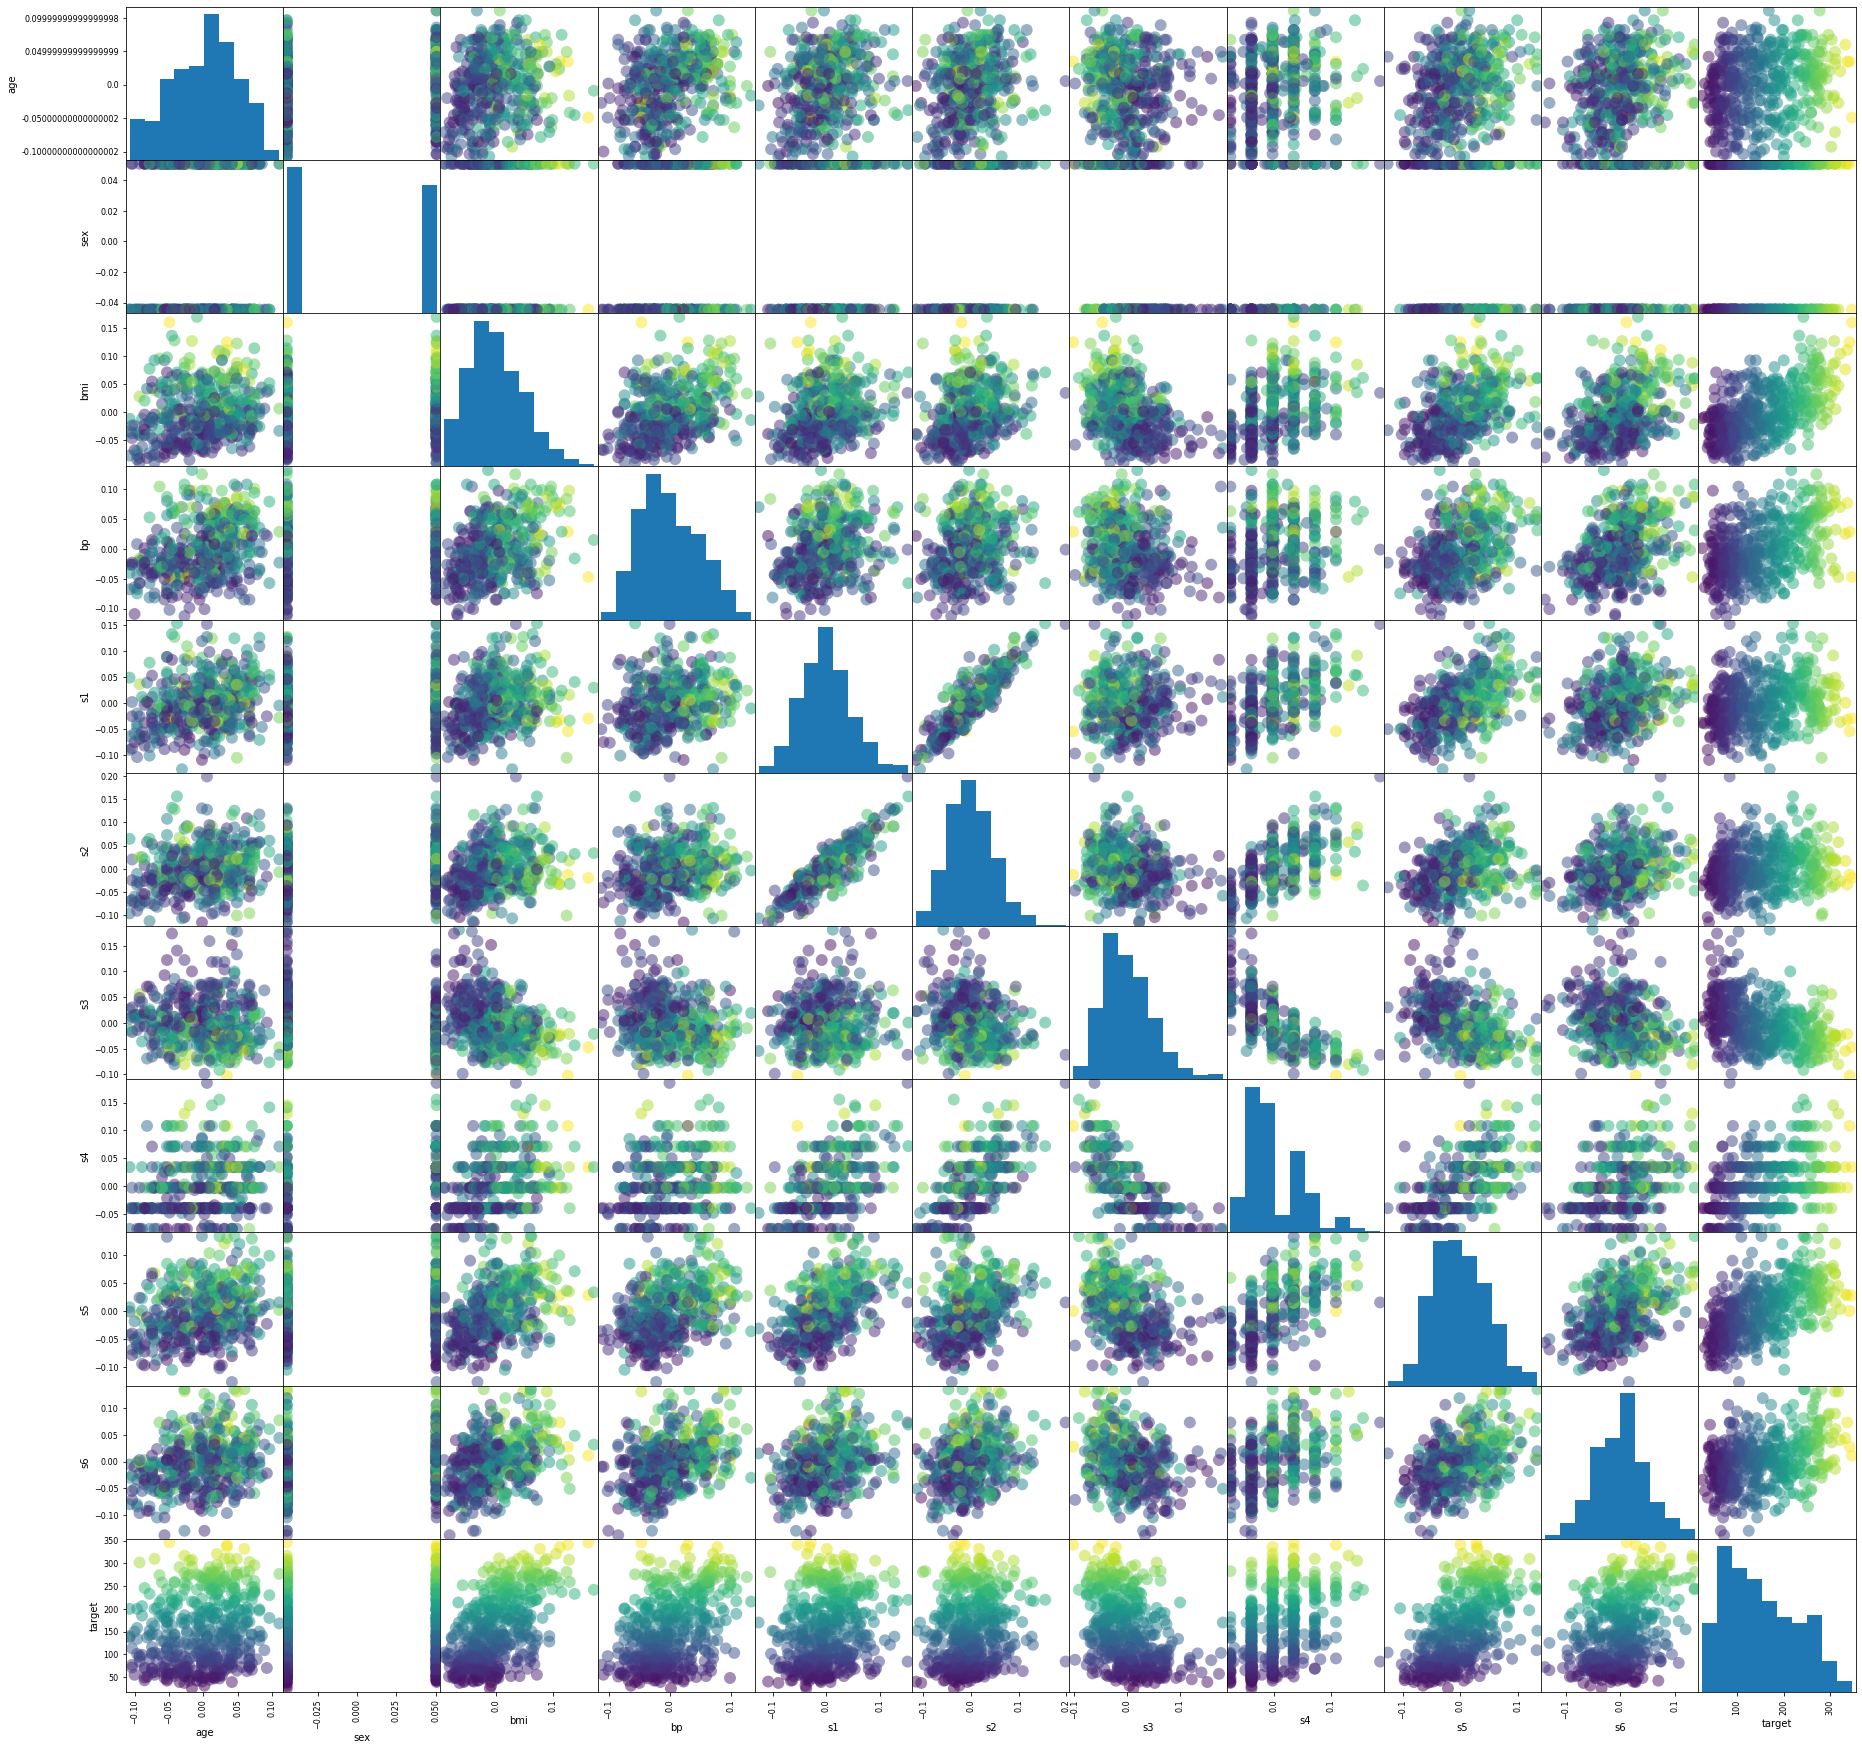

In [10]:
pd.plotting.scatter_matrix(pdata, c=data.target, figsize=[31,31], s=569)
plt.show()

# Train and Test

## Split the Data Set

In [10]:
X, y = data.data, data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Linear Regression:

train mean squared error is 2908.988722583017 and test mean squared error is 2724.244914417011


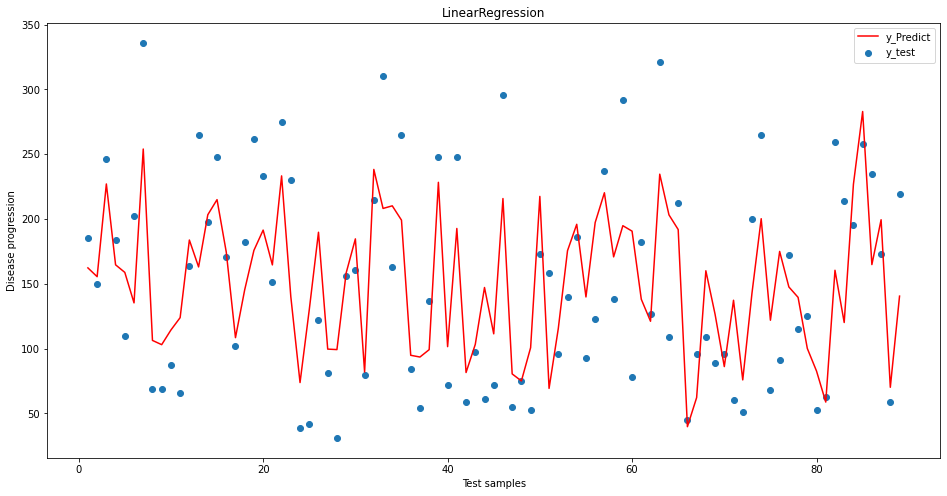

[  -6.18519432 -225.23708873  505.19590913  295.61841278 -826.04604876
  466.90764262  130.73805248  252.95274096  691.08217315  111.20430059]


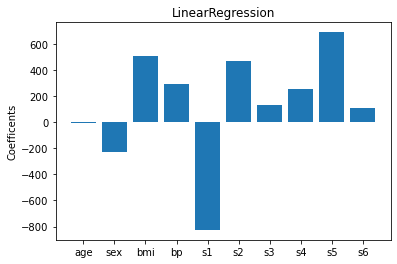

In [20]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

y_train_pred = Linear_model.predict(X_train)
y_test_pred = Linear_model.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred, squared=True)
test_error = mean_squared_error(y_test, y_test_pred, squared=True)

print('train mean squared error is', train_error, 'and test mean squared error is', test_error)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)
plt.scatter(np.arange(1,len(X_test)+1),y_test, label = 'y_test')
plt.plot(np.arange(1,len(X_test)+1),y_test_pred, label = 'y_Predict', color='red')
plt.legend()
plt.title('LinearRegression')
plt.xlabel('Test samples')
plt.ylabel('Disease progression')
plt.show()

LR_coef = Linear_model.coef_
print(LR_coef)

plt.bar(range(10), LR_coef)
plt.title('LinearRegression')
plt.xticks(range(10), data.feature_names)
plt.ylabel('Coefficents')
plt.show()

# Ridge:

[1.00000000e-05 2.06913808e-05 4.28133240e-05 8.85866790e-05
 1.83298071e-04 3.79269019e-04 7.84759970e-04 1.62377674e-03
 3.35981829e-03 6.95192796e-03 1.43844989e-02 2.97635144e-02
 6.15848211e-02 1.27427499e-01 2.63665090e-01 5.45559478e-01
 1.12883789e+00 2.33572147e+00 4.83293024e+00 1.00000000e+01]


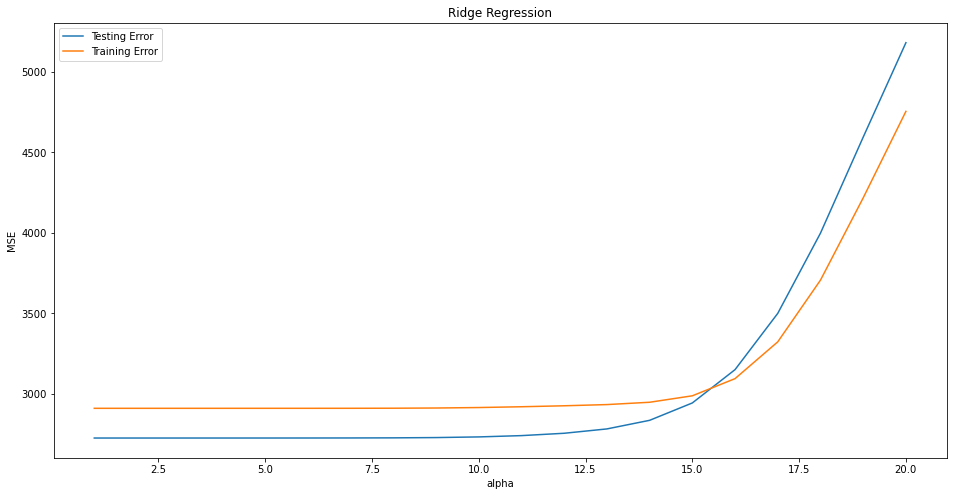

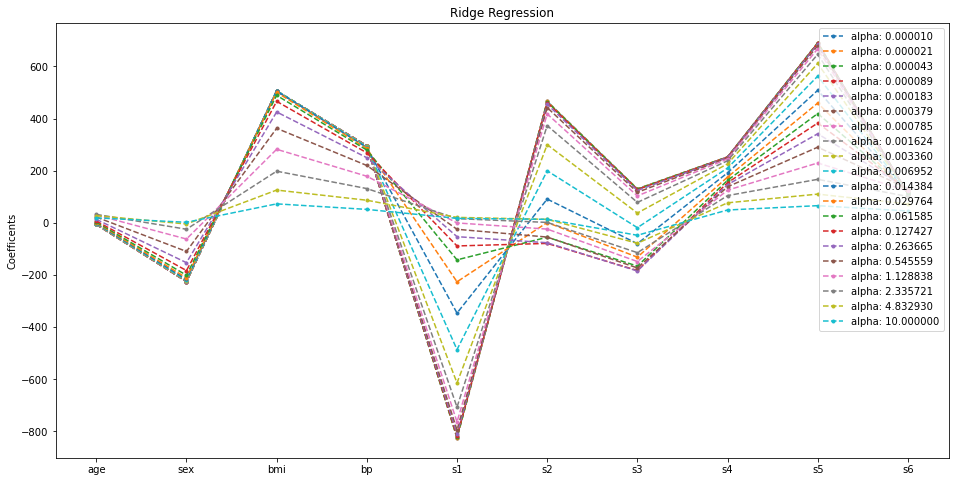

In [21]:
from sklearn.linear_model import Ridge

# Ridge = Ridge(alpha=1, normalize=True)
# Ridge.fit(X_train, y_train)

# y_train_pred = Ridge.predict(X_train)
# y_test_pred = Ridge.predict(X_test)
# train_error = mean_squared_error(y_train, y_train_pred, squared=True)
# test_error = mean_squared_error(y_test, y_test_pred, squared=True)

# print('Ridge train mean squared error is', train_error, 'and Ridge test mean squared error is', test_error)

# f = plt.figure()
# f.set_figwidth(16)
# f.set_figheight(8)
# plt.scatter(np.arange(1,len(X_test)+1),y_test, label = 'y_test')
# plt.plot(np.arange(1,len(X_test)+1),y_test_pred, label = 'y_Predict', color = 'red')
# plt.legend()
# plt.title('Ridge Default')
# plt.xlabel('Test samples')
# plt.ylabel('Disease progression')
# plt.show()
############################################################################################

Ridge = Ridge(normalize=True)
alphas = np.logspace(-5, 1, 20)
# alphas = [0, 0.1];
train_error = []
test_error = []
R_coef = []
ridge_models = {}

for k in alphas:
    Ridge.set_params(alpha = k)
    Ridge.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, Ridge.predict(X_train)))
    test_error.append(mean_squared_error(y_test, Ridge.predict(X_test)))
    R_coef.append(Ridge.coef_)
    ridge_models[k] = Ridge

print(alphas)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)      
# plt.plot(alphas, test_error, label = 'Testing Error')
# plt.plot(alphas, train_error, label = 'Training Error')
plt.plot(np.arange(1,len(test_error)+1), test_error, label = 'Testing Error')
plt.plot(np.arange(1,len(train_error)+1), train_error, label = 'Training Error')
plt.legend()
plt.title('Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()
##########################################################################################

Ridge_coef = np.array(R_coef)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)
for i, alpha in enumerate(alphas):
    plt.plot(range(10), Ridge_coef[i,:], 'o--', markersize=3, 
             label='alpha: %f' % alpha)
plt.legend(loc='best')
plt.title('Ridge Regression')
plt.xticks(range(10), data.feature_names)
plt.ylabel('Coefficents')
plt.show()

Train MSE is: 2932.149110126873 Test MSE is: 2780.796208535659
[   2.9139849  -200.99856689  488.89251758  279.03596399 -142.10493578
  -55.08705598 -165.80726437  162.90267435  419.13815463  119.78331126]


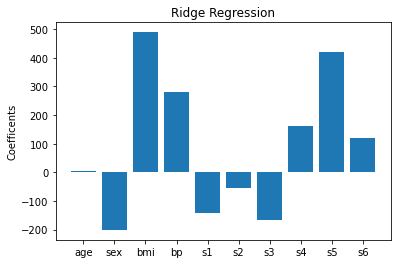

In [43]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.0615, normalize=True)
Ridge = Ridge.fit(X_train, y_train)
Ridge_coef = Ridge.coef_

Train_Error = mean_squared_error(y_train, Ridge.predict(X_train))
Test_Error = mean_squared_error(y_test, Ridge.predict(X_test))
print('Train MSE is:', Train_Error, 'Test MSE is:', Test_Error)
print(Ridge_coef)

plt.bar(range(10), Ridge_coef)
plt.xticks(range(10), data.feature_names)
plt.title('Ridge Regression')
plt.ylabel('Coefficents')
plt.show()

# Lasso:

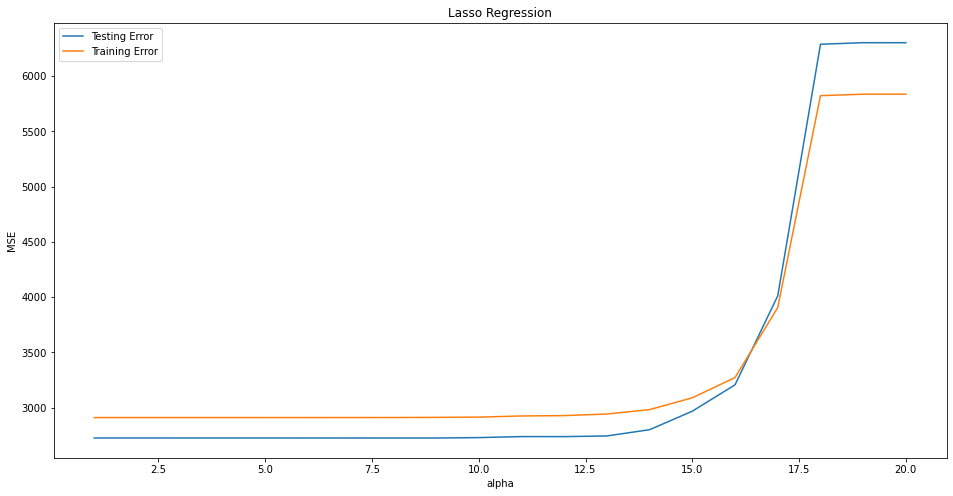

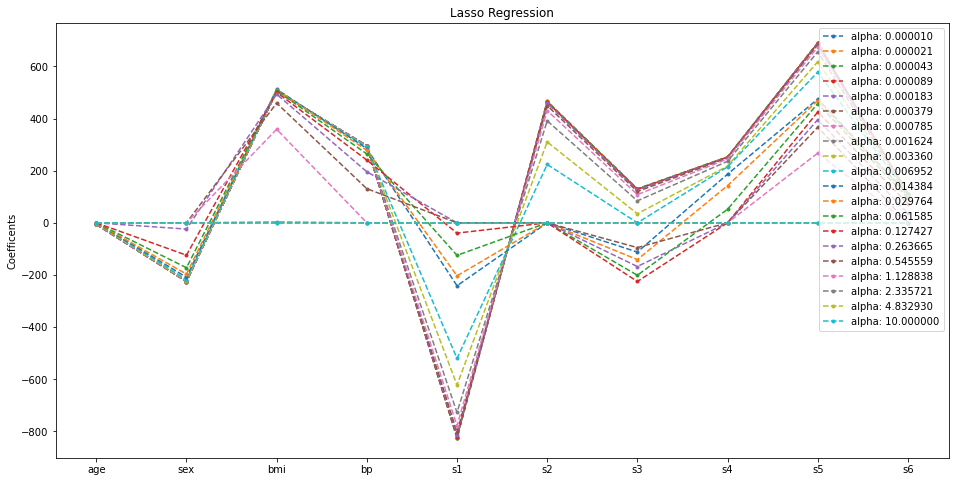

In [25]:
from sklearn.linear_model import Lasso

# Lasso = Lasso(alpha=1, normalize=True)
# Lasso.fit(X_train, y_train)

# y_train_pred = Lasso.predict(X_train)
# y_test_pred = Lasso.predict(X_test)
# train_error = mean_squared_error(y_train, y_train_pred, squared=True)
# test_error = mean_squared_error(y_test, y_test_pred, squared=True)

# print('Lasso train mean squared error is', train_error, 'and Lasso test mean squared error is', test_error)

# f = plt.figure()
# f.set_figwidth(16)
# f.set_figheight(8)
# plt.scatter(np.arange(1,len(X_test)+1),y_test, label = 'y_test')
# plt.plot(np.arange(1,len(X_test)+1),y_test_pred, label = 'y_Predict', color = 'red')
# plt.legend()
# plt.title('Lasso Default')
# plt.xlabel('Test samples')
# plt.ylabel('Disease progression')
# plt.show()
############################################################################################

# Lasso = Lasso(positive=True, normalize=True)
Lasso = Lasso(normalize=True)
alphas = np.logspace(-5, 1, 20)
# alphas = [0, 0.1];
train_error = []
test_error = []
L_coef = []
Lasso_models = {}

for k in alphas:
    Lasso.set_params(alpha = k)
    Lasso.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, Lasso.predict(X_train)))
    test_error.append(mean_squared_error(y_test, Lasso.predict(X_test)))
    L_coef.append(Lasso.coef_)
    Lasso_models[k] = Lasso
    
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)      
# plt.plot(alphas, test_error, label = 'Testing Error')
# plt.plot(alphas, train_error, label = 'Training Error')
plt.plot(np.arange(1,len(test_error)+1), test_error, label = 'Testing Error')
plt.plot(np.arange(1,len(train_error)+1), train_error, label = 'Training Error')
plt.legend()
plt.title('Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()
#########################################################################################

Lasso_coef = np.array(L_coef)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)
for i, alpha in enumerate(alphas):
    plt.plot(range(10), Lasso_coef[i,:], 'o--', markersize=3, 
             label='alpha: %f' % alpha)
plt.legend(loc='best')
plt.title('Lasso Regression')
plt.xticks(range(10), data.feature_names)
plt.ylabel('Coefficents')
plt.show()

Train MSE is: 2941.030030456374 Test MSE is: 2742.618109586721
[   0.         -172.36480985  506.93447803  264.12952565 -125.03885591
   -0.         -200.91621196   52.19504959  457.18325586   94.49510597]


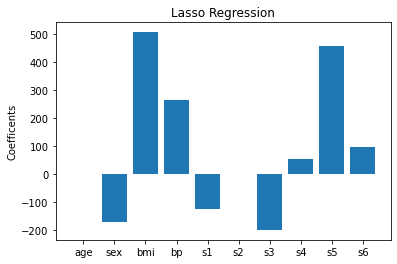

In [44]:
from sklearn.linear_model import Lasso

# lasso = Lasso(alpha=0.061, positive=True, normalize=True)
lasso = Lasso(alpha=0.0615, normalize=True)
Lasso = lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

Train_Error = mean_squared_error(y_train, Lasso.predict(X_train))
Test_Error = mean_squared_error(y_test, Lasso.predict(X_test))
print('Train MSE is:', Train_Error, 'Test MSE is:', Test_Error)
print(lasso_coef)

plt.bar(range(10), lasso_coef)
plt.xticks(range(10), data.feature_names)
plt.title('Lasso Regression')
plt.ylabel('Coefficents')
plt.show()